In [50]:
import numpy as np

# torch里要求数据类型必须是float
x = np.arange(1, 12, dtype=np.float32).reshape(-1, 1)
y = 2 * x + 3

In [51]:
import torch
import torch.nn as nn


# 继承nn.module，实现前向传播，线性回归直接可以看做是全连接层
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()  # 继承父类方法
        self.linear = nn.Linear(input_dim, output_dim)  # 定义全连接层，其中input_dim和output_dim是输入和输出数据的维数

    # 定义前向传播算法
    def forward(self, inp):
        out = self.linear(inp)  # 输入x后，通过全连接层得到输入出结果out
        return out  # 返回被全连接层处理后的结果


# 定义线性回归模型
regression_model = LinearRegressionModel(1, 1)  # x和y都是一维的

In [52]:
# 可以通过to()或者cuda()使用GPU进行模型的训练，需要将模型和数据都转换到GPU上，也可以指定具体的GPU，如.cuda(1)
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
regression_model.to(device)
device

device(type='mps')

In [53]:
epochs = 1000  # 训练次数
learning_rate = 0.01  # 学习速率
optimizer = torch.optim.SGD(regression_model.parameters(), learning_rate)  # 优化器（未来会详细介绍），这里使用随机梯度下降算法（SGD）
criterion = nn.MSELoss()  # 使用均方误差定义损失函数

In [54]:
help(torch.optim.SGD)

Help on class SGD in module torch.optim.sgd:

class SGD(torch.optim.optimizer.Optimizer)
 |  SGD(params, lr=0.001, momentum=0, dampening=0, weight_decay=0, nesterov=False, *, maximize: bool = False, foreach: Optional[bool] = None, differentiable: bool = False)
 |  
 |  Implements stochastic gradient descent (optionally with momentum).
 |  
 |  .. math::
 |     \begin{aligned}
 |          &\rule{110mm}{0.4pt}                                                                 \\
 |          &\textbf{input}      : \gamma \text{ (lr)}, \: \theta_0 \text{ (params)}, \: f(\theta)
 |              \text{ (objective)}, \: \lambda \text{ (weight decay)},                          \\
 |          &\hspace{13mm} \:\mu \text{ (momentum)}, \:\tau \text{ (dampening)},
 |          \:\textit{ nesterov,}\:\textit{ maximize}                                     \\[-1.ex]
 |          &\rule{110mm}{0.4pt}                                                                 \\
 |          &\textbf{for} \: t=1 \: \text

In [62]:
for epoch in range(epochs):
    # 数据类型转换
    inputs = torch.from_numpy(x).to(device)  # 由于x是ndarray数组，需要转换成tensor类型，如果用gpu训练，则会通过to函数把数据传入gpu
    labels = torch.from_numpy(y).to(device)

    # 训练
    optimizer.zero_grad()  # 每次求偏导都会清零，否则会进行叠加
    outputs = regression_model(inputs)  # 把输入传入定义的线性回归模型中，进行前向传播，得到预测结果
    loss = criterion(outputs, labels)  # 通过均方误差评估预测误差
    loss.backward()  # 反向传播
    optimizer.step()  # 更新权重参数

    # 每50次循环打印一次结果
    if epoch % 50 == 0:
        print("epoch:", epoch, "loss:", loss.item())



epoch: 0 loss: 1.8636374388147914e-10
epoch: 50 loss: 1.8636374388147914e-10
epoch: 100 loss: 1.8636374388147914e-10
epoch: 150 loss: 1.8636374388147914e-10
epoch: 200 loss: 1.8636374388147914e-10
epoch: 250 loss: 1.8636374388147914e-10
epoch: 300 loss: 1.8636374388147914e-10
epoch: 350 loss: 1.8636374388147914e-10
epoch: 400 loss: 1.8636374388147914e-10
epoch: 450 loss: 1.8636374388147914e-10
epoch: 500 loss: 1.8636374388147914e-10
epoch: 550 loss: 1.8636374388147914e-10
epoch: 600 loss: 1.8636374388147914e-10
epoch: 650 loss: 1.8636374388147914e-10
epoch: 700 loss: 1.8636374388147914e-10
epoch: 750 loss: 1.8636374388147914e-10
epoch: 800 loss: 1.8636374388147914e-10
epoch: 850 loss: 1.8636374388147914e-10
epoch: 900 loss: 1.8636374388147914e-10
epoch: 950 loss: 1.8636374388147914e-10


In [70]:
regression_model(torch.from_numpy(x).to(device).requires_grad_()).data.cpu().numpy() # 通过训练好的模型预测结果

array([[ 4.9999743],
       [ 6.999978 ],
       [ 8.999983 ],
       [10.999987 ],
       [12.99999  ],
       [14.999994 ],
       [16.999998 ],
       [19.000002 ],
       [21.000006 ],
       [23.00001  ],
       [25.000013 ]], dtype=float32)

In [73]:
optimizer.__dict__

{'defaults': {'lr': 0.01,
  'momentum': 0,
  'dampening': 0,
  'weight_decay': 0,
  'nesterov': False,
  'maximize': False,
  'foreach': None,
  'differentiable': False},
 '_optimizer_step_pre_hooks': OrderedDict(),
 '_optimizer_step_post_hooks': OrderedDict(),
 '_optimizer_state_dict_pre_hooks': OrderedDict(),
 '_optimizer_state_dict_post_hooks': OrderedDict(),
 '_optimizer_load_state_dict_pre_hooks': OrderedDict(),
 '_optimizer_load_state_dict_post_hooks': OrderedDict(),
 '_zero_grad_profile_name': 'Optimizer.zero_grad#SGD.zero_grad',
 'state': defaultdict(dict,
             {Parameter containing:
              tensor([[2.0000]], device='mps:0', requires_grad=True): {'momentum_buffer': None},
              Parameter containing:
              tensor([3.0000], device='mps:0', requires_grad=True): {'momentum_buffer': None}}),
 'param_groups': [{'params': [Parameter containing:
    tensor([[2.0000]], device='mps:0', requires_grad=True),
    Parameter containing:
    tensor([3.0000], devi

In [75]:
torch.save(regression_model.state_dict(), "model.pk1")  # 保存模型
result = regression_model.load_state_dict(torch.load("model.pk1"))  # 加载模型

In [76]:
result()

<All keys matched successfully>

In [77]:
import torch as t

In [78]:
a = t.Tensor(2, 3)
a

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [79]:
b = t.tensor([[1, 2, 3], [4, 5, 6]])

In [88]:
display(b.tolist(), b)

[[1, 2, 3], [4, 5, 6]]

tensor([[1, 2, 3],
        [4, 5, 6]])

In [96]:
b.resize_([3, 3])

tensor([[1, 2, 3],
        [4, 5, 6],
        [0, 0, 0]])

In [97]:
a = t.arange(0, 16).view(4, 4)
a

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])

In [101]:
# 选取对角线的元素
index = t.LongTensor([[0, 1, 2, 3]])
print(f'index: {index}')
a.gather(0, index)  # dim=0

index: tensor([[0, 1, 2, 3]])


tensor([[ 0,  5, 10, 15]])

In [107]:
a.to(device)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]], device='mps:0')

In [109]:
b = t.ones(3, 3)
b.sum(dim=0), b.sum(dim=0, keepdim=True)  # 前者输出形状是(3)，后者输出形状是(1,3)

(tensor([3., 3., 3.]), tensor([[3., 3., 3.]]))

In [115]:
display(a, a.cumsum(dim=0))  # 对第二个维度行的元素按照索引顺序进行累加

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])

tensor([[ 0,  1,  2,  3],
        [ 4,  6,  8, 10],
        [12, 15, 18, 21],
        [24, 28, 32, 36]])

In [116]:
a = t.ones(3, 2)
b = t.ones(2, 3, 1)

In [121]:
a + b

tensor([[[2., 2.],
         [2., 2.],
         [2., 2.]],

        [[2., 2.],
         [2., 2.],
         [2., 2.]]])

In [129]:
%%time
ans = 0
for i in range(1000000):
    ans += i;

CPU times: user 91.6 ms, sys: 1.07 ms, total: 92.7 ms
Wall time: 91.9 ms


In [134]:
if t.backends.mps.is_available:
    a = t.zeros(1)
    t.save(a, "a.pkl")

In [135]:
# 加载为b，存储于gpu1上（因为保存时tensor就在gpu1上）
b = t.load('a.pkl')
# 加载为c，存储于cpu
c = t.load('a.pkl', map_location=lambda storage, loc: storage)
# 加载为d，存储于gpu0上
d = t.load('a.pkl', map_location={'cuda:1': 'cuda:0'})

In [144]:
type(d)

torch.Tensor

In [145]:
import torch as t
from torch.autograd import Variable as V

In [174]:
a = V(t.ones(3, 4), requires_grad=True)
a

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]], requires_grad=True)

In [175]:
b = V(t.zeros(3, 4))
b

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [176]:
c = a+b

In [177]:
# c = a.add(b)  # variable 函数的使用和 tensor 一致，等同于 c=a+b
c

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]], grad_fn=<AddBackward0>)

In [178]:
# 注：虽然没有指定 c 需要求导，但 c 依赖于 a，由于 a 需要求导，因此 c 的 requeires_grad 默认设置为 True
a.requires_grad, b.requires_grad, c.requires_grad

(True, False, True)

In [179]:
# 注：`c.data.sum()`是在去 data 后变为 tensor，从 tensor 计算sum；`c.sum()`计算后仍然是 variable
d = c.sum()
d.backward()  # 反向传播

In [180]:
display(a.grad, c.grad, d.grad)

/var/folders/ll/g9yk3qbd3qnc06sfwm1s4t840000gn/T/ipykernel_81428/712901659.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/build/aten/src/ATen/core/TensorBody.h:494.)
  display(a.grad, c.grad, d.grad)


tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

None

None

In [181]:
def f(x):
    """计算 y"""
    y = x**2 * t.exp(x)
    return y


def grad_f(x):
    """手动对函数求导"""
    dx = 2 * x * t.exp(x) + x**2 * t.exp(x)
    return dx


x = V(t.randn(3, 4), requires_grad=True)
y = f(x)
y

tensor([[1.0483e+01, 4.8500e-05, 2.2099e-01, 1.2519e-01],
        [6.3724e-03, 9.8387e-05, 1.0509e-01, 5.3930e+00],
        [5.4316e+00, 1.8271e-01, 2.6152e+00, 4.5434e-01]],
       grad_fn=<MulBackward0>)

In [182]:
y_grad_variables = t.ones(
    y.size())  # 由于dz/dy=1，并且grad_variables 形状需要与 y 一致，详解看下面的 3.4 小节
y.backward(y_grad_variables)
x.grad

tensor([[ 2.4306e+01,  1.4025e-02, -4.5801e-01, -4.4238e-01],
        [ 1.7228e-01,  2.0035e-02, -4.2708e-01,  1.4052e+01],
        [ 1.4133e+01, -4.6090e-01,  7.9137e+00, -2.5815e-01]])

In [183]:
grad_f(x)  # autograd 计算的结果和利用公式计算的结果一致

tensor([[ 2.4306e+01,  1.4025e-02, -4.5801e-01, -4.4238e-01],
        [ 1.7228e-01,  2.0035e-02, -4.2708e-01,  1.4052e+01],
        [ 1.4133e+01, -4.6090e-01,  7.9137e+00, -2.5815e-01]],
       grad_fn=<AddBackward0>)

In [184]:
x = V(t.ones(1))
b = V(t.rand(1), requires_grad=True)
w = V(t.rand(1), requires_grad=True)
y = w * x  # 等价于 y=w.mul(x)
z = y + b  # 等价于 z=y.add(b)

In [185]:
# 由于 y 依赖于求导的 w，故而即使 y 没有指定requires_grad=True，也为 True；z 同理
x.requires_grad, b.requires_grad, w.requires_grad, y.requires_grad, z.requires_grad

(False, True, True, True, True)

In [186]:
x.is_leaf, b.is_leaf, w.is_leaf, y.is_leaf, z.is_leaf

(True, True, True, False, False)

In [196]:
z.grad_fn

In [195]:
# grad_fn 可以查看这个 variable 的反向传播函数
# 由于 z 是 add 函数的输出，所以它的反向传播函数是 AddBackward
display(x.grad_fn, b.grad_fn ,w.grad_fn, y.grad_fn, z.grad_fn)

None

None

None

In [193]:
# next_functions 保存 grad_fn 的输入，grad_fn 是一个元组
# 第一个是 y，它是乘法的输出，所以对应的反向传播函数 y.grad_fn 是 MulBackward
# 第二个是 b，它是叶子节点，由用户创建，grad_fn 为 None，但是有 z.grad_fn.next_functions
z.grad_fn.next_functions

((<MulBackward0 at 0x7f7dab3cad30>, 0),
 (<AccumulateGrad at 0x7f7dab3ca160>, 0))

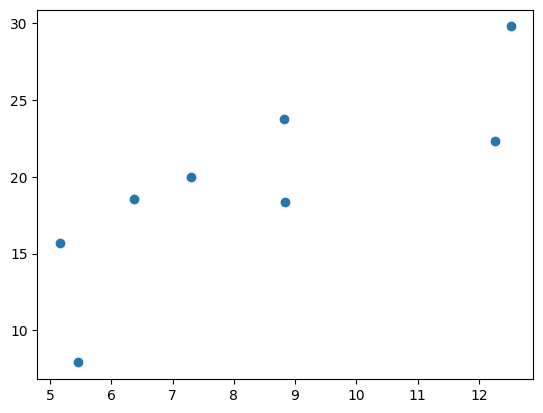

In [197]:
import torch as t
from torch.autograd import Variable as V
# 不是 jupyter 运行请注释掉下面一行，为了 jupyter 显示图片
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display

t.manual_seed(1000)  # 随机数种子


def get_fake_data(batch_size=8):
    """产生随机数据：y = x * 2 + 3，同时加上了一些噪声"""
    x = t.rand(batch_size, 1) * 20
    y = x * 2 + (1 + t.randn(batch_size, 1)) * 3  # 噪声为 |3-((1 + t.randn(batch_size, 1)) * 3)|

    return x, y


# 查看 x，y 的分布情况
x, y = get_fake_data()
plt.scatter(x.squeeze().numpy(), y.squeeze().numpy())
plt.show()

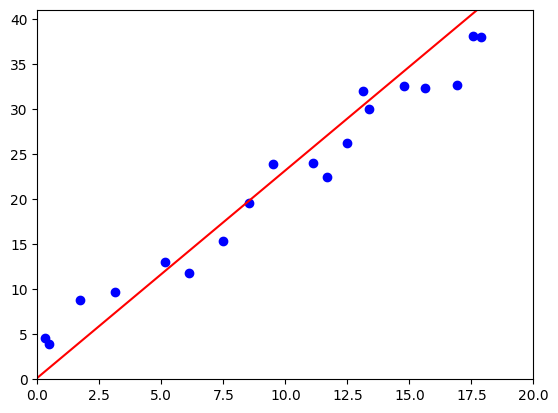

In [198]:
# 随机初始化参数
w = V(t.rand(1, 1), requires_grad=True)
b = V(t.zeros(1, 1), requires_grad=True)

lr = 0.001  # 学习率

for i in range(8000):
    x, y = get_fake_data()
    x, y = V(x), V(y)

    # forwad：计算 loss
    y_pred = x.mm(w) + b.expand_as(y)
    loss = 0.5 * (y_pred - y)**2
    loss = loss.sum()

    # backward：自动计算梯度
    loss.backward()

    # 更新参数
    w.data.sub_(lr * w.grad.data)
    b.data.sub_(lr * b.grad.data)

    # 梯度清零，不清零则会进行叠加，影响下一次梯度计算
    w.grad.data.zero_()
    b.grad.data.zero_()

    if i % 1000 == 0:
        # 画图
        display.clear_output(wait=True)
        x = t.arange(0, 20, dtype=t.float).view(-1, 1)
        y = x.mm(w.data) + b.data.expand_as(x)
        plt.plot(x.numpy(), y.numpy(), color='red')  # 预测效果

        x2, y2 = get_fake_data(batch_size=20)
        plt.scatter(x2.numpy(), y2.numpy(), color='blue')  # 真实数据

        plt.xlim(0, 20)
        plt.ylim(0, 41)
        plt.show()
        plt.pause(0.5)
        break  # 注销这一行，可以看到动态效果

In [202]:
dir(torch.nn.Module)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_call_impl',
 '_compiled_call_impl',
 '_get_backward_hooks',
 '_get_backward_pre_hooks',
 '_get_name',
 '_load_from_state_dict',
 '_maybe_warn_non_full_backward_hook',
 '_named_members',
 '_register_load_state_dict_pre_hook',
 '_register_state_dict_hook',
 '_replicate_for_data_parallel',
 '_save_to_state_dict',
 '_slow_forward',
 '_version',
 '_wrapped_call_impl',
 'add_module',
 'apply',
 'bfloat16',
 'buffers',
 'call_super_init',
 'children',
 'compile',
 'cpu',
 'cuda',
 'double',
 'dump_patches',
 'eval',
